# EEG classification: Andrzejak's dataset (ZFS) with white noise

In [3]:
%%html
<!--hide_me_please-->

<p class="showcode" id="first123456aa"><a href="javascript:code_toggle('#first123456')">show codes in the notebook</a></p>
<p class="hidecode" id="first123456"><a href="javascript:code_toggle('#first123456aa')">hide codes in the notebook</a></p>

<p class="showoutput_text" id="first123456aa_text"><a href="javascript:output_text_toggle('#first123456_text')">show text outputs in the notebook</a></p>
<p class="hideoutput_text" id="first123456_text"><a href="javascript:output_text_toggle('#first123456aa_text')">hide text outputs in the notebook</a></p>

In [1]:
# hide_me_please
from IPython.display import HTML

def this_is_temporary_cell():
    cell_output_is_temporary()

def cell_output_is_temporary():
    HTML("<!--this_is_temporary_output-->")
    print("# this_is_temporary_output")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Initialization" data-toc-modified-id="1.-Initialization-1">1. Initialization</a></span></li><li><span><a href="#2.-Loading-data-and-adding-transformed-features" data-toc-modified-id="2.-Loading-data-and-adding-transformed-features-2">2. Loading data and adding transformed features</a></span><ul class="toc-item"><li><span><a href="#(Z),-(F),-(S)" data-toc-modified-id="(Z),-(F),-(S)-2.1">(Z), (F), (S)</a></span></li></ul></li><li><span><a href="#3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN" data-toc-modified-id="3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN-3">3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN</a></span><ul class="toc-item"><li><span><a href="#3.1.-Parameters-selection" data-toc-modified-id="3.1.-Parameters-selection-3.1">3.1. Parameters selection</a></span></li><li><span><a href="#3.2.-Final-scores" data-toc-modified-id="3.2.-Final-scores-3.2">3.2. Final scores</a></span></li></ul></li><li><span><a href="#4.-Guo-et-al.-(2012)-best-statistics-with-KNN" data-toc-modified-id="4.-Guo-et-al.-(2012)-best-statistics-with-KNN-4">4. Guo et al. (2012) best statistics with KNN</a></span><ul class="toc-item"><li><span><a href="#4.1.-Parameters-selection" data-toc-modified-id="4.1.-Parameters-selection-4.1">4.1. Parameters selection</a></span></li><li><span><a href="#4.2.-Final-scores" data-toc-modified-id="4.2.-Final-scores-4.2">4.2. Final scores</a></span></li></ul></li><li><span><a href="#5.-AR-of-single-signal-–-KNN" data-toc-modified-id="5.-AR-of-single-signal-–-KNN-5">5. AR of single signal – KNN</a></span><ul class="toc-item"><li><span><a href="#5.1.-Parameters-selection" data-toc-modified-id="5.1.-Parameters-selection-5.1">5.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#5.1.1.-Iteration-no.-1" data-toc-modified-id="5.1.1.-Iteration-no.-1-5.1.1">5.1.1. Iteration no. 1</a></span></li><li><span><a href="#5.1.2.-Iteration-no.-2" data-toc-modified-id="5.1.2.-Iteration-no.-2-5.1.2">5.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#5.2.-Final-scores" data-toc-modified-id="5.2.-Final-scores-5.2">5.2. Final scores</a></span></li></ul></li><li><span><a href="#6.-AR-based-PSD-of-single-signal-–-KNN" data-toc-modified-id="6.-AR-based-PSD-of-single-signal-–-KNN-6">6. AR-based PSD of single signal – KNN</a></span><ul class="toc-item"><li><span><a href="#6.1.-Parameters-selection" data-toc-modified-id="6.1.-Parameters-selection-6.1">6.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Iteration-no.-1" data-toc-modified-id="6.1.1.-Iteration-no.-1-6.1.1">6.1.1. Iteration no. 1</a></span></li><li><span><a href="#6.1.2.-Iteration-no.-2" data-toc-modified-id="6.1.2.-Iteration-no.-2-6.1.2">6.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#6.2.-Final-scores" data-toc-modified-id="6.2.-Final-scores-6.2">6.2. Final scores</a></span></li></ul></li><li><span><a href="#7.-AR-of-single-signal-–-logistic-regression" data-toc-modified-id="7.-AR-of-single-signal-–-logistic-regression-7">7. AR of single signal – logistic regression</a></span><ul class="toc-item"><li><span><a href="#7.1.-Parameters-selection" data-toc-modified-id="7.1.-Parameters-selection-7.1">7.1. Parameters selection</a></span></li><li><span><a href="#7.2.-Final-scores" data-toc-modified-id="7.2.-Final-scores-7.2">7.2. Final scores</a></span></li></ul></li><li><span><a href="#8.-AR-of-single-signal-–-MLP" data-toc-modified-id="8.-AR-of-single-signal-–-MLP-8">8. AR of single signal – MLP</a></span><ul class="toc-item"><li><span><a href="#8.1.-Parameters-selection" data-toc-modified-id="8.1.-Parameters-selection-8.1">8.1. Parameters selection</a></span></li><li><span><a href="#8.2.-Final-scores" data-toc-modified-id="8.2.-Final-scores-8.2">8.2. Final scores</a></span></li></ul></li><li><span><a href="#9.-Models-performance-ranking" data-toc-modified-id="9.-Models-performance-ranking-9">9. Models performance ranking</a></span></li><li><span><a href="#END" data-toc-modified-id="END-10">END</a></span></li></ul></div>

## 1. Initialization

In [5]:
# !pip install ../timeseries/
# !pip install git+https://github.com/krzpiesiewicz/timeseries

In [6]:
# !pip uninstall timeseries

In [7]:
# !pip install cesium

In [8]:
# !pip install PyWavelets

In [9]:
# load extensions
%load_ext nb_black
%load_ext autoreload
%autoreload 2
%aimport timeseries

<IPython.core.display.Javascript object>

In [40]:
import IPython.display
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import timeseries as tss
from timeseries import plot_ts
from timeseries.transform import IHSTransformer, get_smoothed

from cesium import datasets, featurize
import pywt

from codes.ar_psd import (
    ols,
    burg,
    ld_biased,
    ar_coeffs,
    psd_fun_from_ar,
    ar_features,
    psd_ar_features,
)
from codes.guo import guo_features
from codes.knn import knn_scores
from codes.logreg import logreg_scores
from codes.mlp import mlp_scores
from codes.selection import (
    start_timer,
    set_work,
    print_progress,
    print_res,
    sorted_by_score,
    simple_scorings,
    full_scorings,
)

<IPython.core.display.Javascript object>

In [11]:
# import warnings

# warnings.filterwarnings("ignore")
plt.rcParams.update(
    {
        "figure.max_open_warning": 0,
    }
)

<IPython.core.display.Javascript object>

## 2. Loading data and adding transformed features

### (Z), (F), (S)

In [12]:
eeg = datasets.fetch_andrzejak()

###Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16")  #  allocate memory for longer class names
mask = ~np.logical_or(eeg["classes"] == "O", eeg["classes"] == "N")
ids = np.where(mask)[0]
eeg["measurements"] = [eeg["measurements"][i] for i in ids]
eeg["classes"] = eeg["classes"][mask]
eeg["classes"][eeg["classes"] == "Z"] = "Normal"
eeg["classes"][eeg["classes"] == "F"] = "Interictal"
eeg["classes"][eeg["classes"] == "S"] = "Ictal"

Loaded data from cached archive.


<IPython.core.display.Javascript object>

In [13]:
def gen_wn(ts, seed):
    rng = np.random.default_rng(seed)
    wn_sum = 0

    rand_fun = rng.laplace

    for s in [3, 6]:
        wn0 = rand_fun(0, 1, len(ts))
        wn1 = rand_fun(0, 1, len(ts))
        wn2 = rand_fun(0, 1, len(ts))
        wn3 = rand_fun(0, 1, len(ts))
        wn4 = rand_fun(0, 1, len(ts))
        wn5 = rand_fun(0, 1, len(ts))
        wn6 = rand_fun(0, 1, len(ts))
        wn7 = rand_fun(0, 1, len(ts))
        wn8 = rand_fun(0, 1, len(ts))
        wn9 = rand_fun(0, 1, len(ts))
        wn = wn0 * wn1 * wn2 * wn3 * wn4  # * wn5 * wn6 * wn7 * wn8 * wn9
        wn = get_smoothed(pd.Series(wn), std=s, only_prevs=False)
        wn = wn * np.std(ts) / np.std(wn) / np.sqrt(s)
        wn_sum += wn
    wn = wn_sum * np.std(ts) / np.std(wn_sum) * 2
    #     wn = np.minimum(wn, 5 * np.std(ts))
    #     wn = np.maximum(wn, -5 * np.std(ts))
    return wn.values

<IPython.core.display.Javascript object>

In [14]:
trans_ids = np.where(eeg["classes"] == "Normal")[0]

<IPython.core.display.Javascript object>

In [15]:
np.unique(eeg["classes"], return_counts=True)

(array(['Ictal', 'Interictal', 'Normal'], dtype='<U16'),
 array([100, 100, 100]))

<IPython.core.display.Javascript object>

In [16]:
select_params_idx, eval_idx, _, _ = train_test_split(
    np.arange(0, len(eeg["classes"])), eeg["classes"], random_state=7, train_size=0.3
)
select_params_idx = pd.Index(np.sort(select_params_idx))
eval_idx = pd.Index(np.sort(eval_idx))

<IPython.core.display.Javascript object>

In [17]:
sampling_freq = 173.6  # Hz

<IPython.core.display.Javascript object>

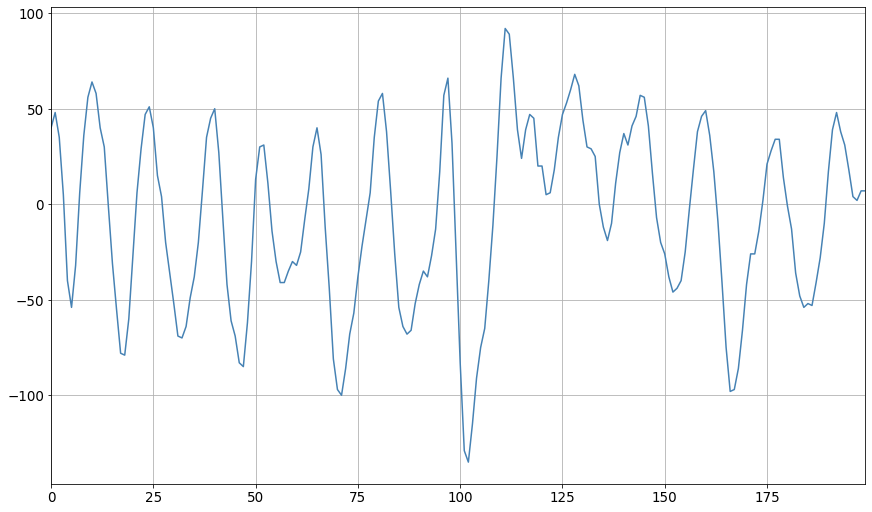

<IPython.core.display.Javascript object>

In [18]:
ts = eeg["measurements"][0][:200]
fig = plot_ts(ts)
fig

In [19]:
eeg["measurements_with_wn"] = [
    m + gen_wn(m, idx) for idx, m in enumerate(eeg["measurements"])
]

<IPython.core.display.Javascript object>

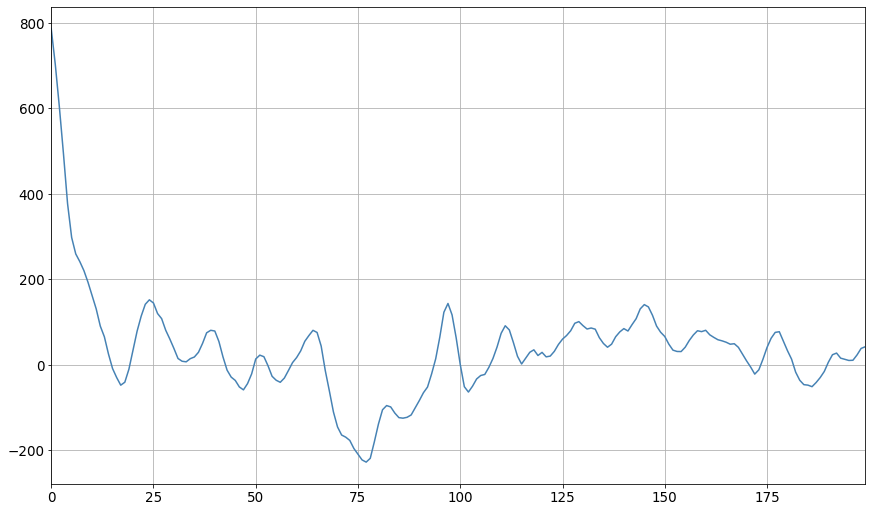

<IPython.core.display.Javascript object>

In [20]:
ts = eeg["measurements_with_wn"][0][:200]
fig = plot_ts(ts)
fig

In [21]:
n_channels = 4
eeg["dwts"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_with_wn"]
]

<IPython.core.display.Javascript object>

In [22]:
%%time
# standard normalization
transformation_train_intv = tss.Interval(eeg["measurements_with_wn"][0], 0, 1000)
standard_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=None, verbose=True) for ts in eeg["measurements_with_wn"]
]
eeg["measurements_normed"] = [trans.transform(ts) for ts, trans in zip(eeg["measurements_with_wn"], standard_trans)]

CPU times: user 826 ms, sys: 13.4 ms, total: 839 ms
Wall time: 857 ms


<IPython.core.display.Javascript object>

In [23]:
# %%time
# # IHS normalization
# ihs_trans = [
#     IHSTransformer(transformation_train_intv.view(ts), d=0, verbose=True) for ts in eeg["measurements_wiht_wn"]
# ]

<IPython.core.display.Javascript object>

In [28]:
this_is_temporary_cell()

lmbs = [
    0.010624999999999999,
    0.010953125,
    0.012328124999999997,
    0.017874999999999995,
    0.019640624999999988,
    0.017249999999999995,
    0.01934374999999999,
    0.017968749999999995,
    0.016843749999999994,
    0.013093749999999998,
    0.012968749999999998,
    0.016249999999999994,
    0.0111875,
    0.016281249999999994,
    0.023624999999999986,
    0.007887500000000004,
    0.015281249999999996,
    0.015593749999999993,
    0.008725000000000004,
    0.02181249999999999,
    0.029874999999999985,
    0.03565624999999997,
    0.014531249999999996,
    0.017406249999999995,
    0.0071125000000000025,
    0.014328124999999995,
    0.015749999999999993,
    None,
    0.02128124999999999,
    0.006925000000000002,
    0.02071874999999999,
    0.01956249999999999,
    0.008606250000000003,
    0.013874999999999998,
    0.018218749999999995,
    0.0116875,
    None,
    0.008512500000000004,
    0.012515624999999997,
    0.009887500000000002,
    0.0070500000000000024,
    0.006587500000000003,
    0.024656249999999987,
    0.007487500000000003,
    0.014656249999999996,
    0.027499999999999986,
    0.0116875,
    0.013874999999999998,
    0.0038500000000000014,
    0.018718749999999996,
    0.01996874999999999,
    0.018687499999999996,
    0.025062499999999988,
    0.014624999999999996,
    0.016812499999999994,
    0.014156249999999995,
    0.015937499999999993,
    0.019031249999999993,
    0.02201562499999999,
    0.008512500000000004,
    0.002650000000000001,
    0.015656249999999993,
    0.02046874999999999,
    0.014890624999999996,
    0.017812499999999995,
    0.03174999999999999,
    0.017749999999999995,
    0.013937499999999999,
    0.007250000000000003,
    0.010124999999999999,
    0.0023500000000000005,
    0.018499999999999996,
    0.012484374999999997,
    0.017515624999999993,
    0.02303124999999999,
    0.02693749999999999,
    0.011007812499999999,
    0.012203124999999997,
    0.015562499999999993,
    0.014906249999999996,
    0.009875000000000002,
    0.011828125,
    0.011171875,
    0.01949999999999999,
    0.010062499999999999,
    0.009837500000000002,
    0.015968749999999993,
    0.012687499999999997,
    0.011984374999999999,
    0.015562499999999993,
    0.014843749999999996,
    0.017843749999999995,
    0.017062499999999994,
    0.017390624999999993,
    0.024968749999999987,
    0.008237500000000003,
    0.013374999999999998,
    0.013874999999999998,
    0.02112499999999999,
    0.017640624999999993,
    0.008325000000000003,
    0.006975000000000003,
    0.009606250000000004,
    0.013140624999999998,
    0.008875000000000004,
    0.018562499999999996,
    0.014031249999999995,
    0.012624999999999997,
    0.0017781250000000002,
    0.007431250000000003,
    0.015656249999999993,
    0.010203124999999999,
    0.016062499999999993,
    0.023468749999999986,
    0.02606249999999999,
    0.008775000000000002,
    0.015906249999999993,
    0.008337500000000003,
    0.010218749999999999,
    0.013156249999999998,
    0.007968750000000004,
    0.0045937500000000015,
    0.012140624999999997,
    0.012328124999999997,
    0.008862500000000004,
    0.040937499999999974,
    0.010796875,
    0.013843749999999998,
    0.005293750000000002,
    0.0051750000000000025,
    0.009425000000000006,
    0.005987500000000003,
    0.011390625,
    0.015749999999999993,
    0.013343749999999998,
    0.017562499999999995,
    0.014531249999999996,
    0.008112500000000003,
    0.008437500000000004,
    0.018093749999999995,
    0.017406249999999995,
    0.023968749999999987,
    0.007193750000000002,
    0.006850000000000003,
    0.014359374999999995,
    0.014296874999999995,
    0.010046874999999999,
    0.012484374999999997,
    0.01993749999999999,
    0.013124999999999998,
    0.005412500000000002,
    0.01159375,
    0.011796875,
    0.009087500000000004,
    0.015187499999999996,
    None,
    0.005025000000000002,
    0.014406249999999995,
    0.011734375,
    0.0014343750000000003,
    0.008406250000000004,
    0.009287500000000002,
    0.023937499999999987,
    0.013765624999999998,
    0.006975000000000003,
    0.018531249999999996,
    0.007375000000000003,
    0.017249999999999995,
    0.013499999999999998,
    0.009075000000000003,
    0.015156249999999996,
    0.02706249999999999,
    0.003796875000000001,
    0.010296874999999999,
    None,
    0.0038031250000000014,
    0.014468749999999996,
    0.013249999999999998,
    0.016062499999999993,
    0.01968749999999999,
    0.018312499999999995,
    0.004087500000000001,
    0.012499999999999997,
    0.01078125,
    0.015718749999999993,
    0.004943750000000001,
    0.009150000000000004,
    0.014499999999999996,
    0.009462500000000006,
    0.0067500000000000025,
    0.006850000000000003,
    0.008825000000000003,
    0.015531249999999993,
    0.015187499999999996,
    0.010437499999999999,
    0.01178125,
    0.004312500000000002,
    0.009425000000000006,
    0.03281249999999998,
    0.012249999999999997,
    0.003059375000000001,
    0.000845,
    0.0021312500000000003,
    0.0014750000000000002,
    0.005050000000000002,
    0.002953125000000001,
    0.0017218750000000003,
    0.0021671875000000007,
    0.0023750000000000004,
    0.000910625,
    0.0022343750000000007,
    0.004218750000000001,
    0.003165625000000001,
    0.001334375,
    0.004653125000000001,
    0.0013007812500000003,
    0.0026250000000000006,
    0.007912500000000005,
    0.0014687500000000002,
    0.001015625,
    0.0017953125000000005,
    0.0009612499999999999,
    0.004031250000000002,
    0.004581250000000002,
    0.0017218750000000003,
    0.0021015625,
    0.0052625000000000016,
    0.0027687500000000004,
    0.0023250000000000007,
    0.004568750000000002,
    0.003046875000000001,
    0.003150000000000001,
    0.0006225,
    0.0008275,
    0.0023843750000000006,
    0.0013437500000000001,
    0.0037187500000000007,
    0.004693750000000002,
    0.0023812500000000006,
    0.0023125000000000008,
    0.0018875000000000003,
    0.0007625,
    0.0026812500000000013,
    0.0019375000000000004,
    0.007675000000000003,
    0.0037375000000000012,
    0.0021656250000000004,
    0.0038593750000000013,
    0.0017687500000000004,
    0.006168750000000002,
    0.0017046875000000003,
    0.001484375,
    0.0021906250000000007,
    0.0014703125000000003,
    0.002703125000000001,
    0.003425000000000001,
    0.000895,
    0.007375000000000003,
    0.002253125000000001,
    0.0010406250000000003,
    0.0027750000000000006,
    0.008087500000000003,
    0.004793750000000002,
    0.0012015625000000002,
    0.0017218750000000003,
    0.0009425,
    0.0014687500000000002,
    0.000775,
    None,
    0.002481250000000001,
    0.0015718750000000004,
    0.006406250000000002,
    0.0013203125000000003,
    0.0012921875000000002,
    0.0018125000000000003,
    0.001334375,
    0.00209375,
    0.0037187500000000007,
    0.003125000000000001,
    0.004193750000000001,
    0.0042937500000000016,
    0.0015984375000000002,
    0.004487500000000002,
    0.00063875,
    0.008162500000000003,
    0.003543750000000001,
    0.006637500000000003,
    0.0017007812500000005,
    0.001359375,
    0.0023218750000000006,
    0.0015375000000000002,
    0.0021625000000000004,
    0.0009475,
    0.002843750000000001,
    0.004856250000000002,
    0.0016125000000000002,
    0.005571875000000002,
    0.0020812500000000006,
    0.0013734375,
    0.001365625,
]

ihs_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=lmb, verbose=True)
    for ts, lmb in zip(eeg["measurements_with_wn"], lmbs)
]

# this_is_temporary_output


<IPython.core.display.Javascript object>

In [29]:
eeg["measurements_ihs"] = [
    trans.transform(ts) for ts, trans in zip(eeg["measurements_with_wn"], ihs_trans)
]

<IPython.core.display.Javascript object>

In [ ]:
# ihs_trans_lst = []
# for trans_idx in trans_idx:
#     ihs_trans_inst = IHSTransformer(
#         pd.Series(eeg["measurements_normed"][trans_idx]), verbose=True, d=0
#     )
#     if ihs_trans_inst.lmb is not None:
#         ihs_trans_lst.append(ihs_trans_inst)

In [ ]:
# lmbs = [ihs_trans.lmb for ihs_trans in ihs_trans_lst]
# means = [ihs_trans.mean for ihs_trans in ihs_trans_lst]
# stds = [ihs_trans.std for ihs_trans in ihs_trans_lst]

In [ ]:
# lmbs

In [ ]:
# lmbs = [lmb for lmb in lmbs if lmb < 1]

In [ ]:
# mean_lmb = np.mean(lmbs)
# mean_std = np.mean(stds)
# means_mean = np.mean(means)

In [ ]:
# ihs_trans = IHSTransformer(
#     pd.Series(eeg["measurements_normed"][trans_idx]), lmb=mean_lmb, d=0
# )
# ihs_trans.mean = means_mean
# ihs_trans.std = mean_std

In [ ]:
# %%time

# eeg["measurements_ihs"] = eeg["measurements_normed"].copy()
# for i in range(len(eeg["measurements_ihs"])):
#     eeg["measurements_ihs"][i] = ihs_trans.transform(
#         pd.Series(eeg["measurements_ihs"][i])
#     ).values

In [30]:
n_channels = 4

eeg["dwts_original"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_with_wn"]
]

eeg["dwts_ihs"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_ihs"]
]

eeg["dwts_standard"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_normed"]
]

<IPython.core.display.Javascript object>

## 3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN

In [237]:
fset_dwt = featurize.featurize_time_series(
    times=None,
    values=eeg["dwts"],
    errors=None,
    features_to_use=list(guo_features.keys()),
    custom_functions=guo_features,
)

<IPython.core.display.Javascript object>

### 3.1. Parameters selection

In [265]:
%%time
metrics = [
    "cosine",
    "manhattan",
    "l1",
    "l2",
    "cityblock",
    "braycurtis",
    "correlation",
    "minkowski",
    "sqeuclidean",
]
ns_for_knn = [n for n in range(3, 16)]

dwt_select_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=select_params_idx,
    cv=1,
    model_random_state=[i for i in range(10, 20)],
    n=ns_for_knn,
    metrics=metrics,
    scorings_dct=simple_scorings,
    print_scores=False,
    metric_in_key=True,
)

CPU times: user 15.7 s, sys: 0 ns, total: 15.7 s
Wall time: 15.8 s


<IPython.core.display.Javascript object>

In [266]:
sorted_select_res = sorted_by_score(dwt_select_scores, ["test_acc", "test_bacc"])

<IPython.core.display.Javascript object>

In [267]:
print_res(sorted_select_res[:5])

KNN( 4), metric: cosine, random_splits: 10
Wavelet transform features ------ train_acc: 94.35%, train_bacc: 93.93%, test_acc: 91.79%, test_bacc: 92.25%
KNN( 4), metric: correlation, random_splits: 10
Wavelet transform features ------ train_acc: 94.35%, train_bacc: 93.93%, test_acc: 91.79%, test_bacc: 92.25%
KNN( 3), metric: cosine, random_splits: 10
Wavelet transform features ------ train_acc: 94.52%, train_bacc: 94.11%, test_acc: 91.79%, test_bacc: 92.04%
KNN( 3), metric: correlation, random_splits: 10
Wavelet transform features ------ train_acc: 94.35%, train_bacc: 93.95%, test_acc: 91.43%, test_bacc: 91.62%
KNN( 8), metric: cosine, random_splits: 10
Wavelet transform features ------ train_acc: 92.90%, train_bacc: 92.37%, test_acc: 90.71%, test_bacc: 91.25%


<IPython.core.display.Javascript object>

 ### 3.2. Final scores

In [353]:
%%time
dwt_final_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=eval_idx,
    cv=1,
    cv_random_state=100,
    model_random_state=[i for i in range(100, 400)],
    n=4,
    metrics="cosine",
    scorings_dct=full_scorings,
    print_scores=False,
    metric_in_key=True,
)

sorted_dwt_final_res = sorted_by_score(dwt_final_scores, ["test_acc", "test_bacc"])

CPU times: user 31.4 s, sys: 20.7 s, total: 52.2 s
Wall time: 21.4 s


<IPython.core.display.Javascript object>

In [354]:
print_res(sorted_dwt_final_res, train_confusion_matrix=True, test_confusion_matrix=True)

KNN(K= 4), metric: cosine, random_splits: 300
Wavelet transform features ------ train_acc: 94.51%, train_bacc: 94.50%, test_acc: 90.55%, test_bacc: 90.66%
train confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.975842   0.024158  0.000000
     Interictal  0.088680   0.904454  0.006866
     Normal      0.000000   0.045318  0.954682

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.962139   0.037861  0.000000
     Interictal  0.121412   0.854873  0.023714
     Normal      0.000000   0.097253  0.902747

<IPython.core.display.Javascript object>

In [106]:
this_is_temporary_cell()

pprint(sorted_dwt_final_res)

# this_is_temporary_output
[((0.9055, 0.9066),
  {'fset': 'Wavelet transform features',
   'fset_print_name': 'Wavelet transform features',
   'metric': 'cosine',
   'metric_print_name': 'cosine',
   'model_name': 'KNN(K= 4), metric: cosine',
   'n': 4,
   'random_splits': 300,
   'test_acc': 0.9055026455026443,
   'test_bacc': 0.9065863068563724,
   'train_acc': 0.9451247165532918,
   'train_bacc': 0.944992682162704})]


## 4. Guo et al. (2012) best statistics with KNN

In [ ]:
fsets_keys = ["original", "standard", "ihs"]

dwt_st_fsets = {fset_key: featurize.featurize_time_series(
    times=None,
    values=eeg[f"dwts_{fset_key}"],
    errors=None,
    features_to_use=list(guo_features.keys()),
    custom_functions=guo_features,
) for fset_key in fsets_keys}

### 4.1. Parameters selection

In [ ]:
%%time
metrics = [
    "cosine",
    "manhattan",
    "l1",
    "l2",
    "cityblock",
    "braycurtis",
    "correlation",
    "minkowski",
    "sqeuclidean",
]
ns_for_knn = [n for n in range(3, 16)]

dwt_select_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=select_params_idx,
    cv=1,
    model_random_state=[i for i in range(10, 20)],
    n=ns_for_knn,
    metrics=metrics,
    scorings_dct=simple_scorings,
    print_scores=False,
    metric_in_key=True,
)

In [ ]:
sorted_select_res = sorted_by_score(dwt_select_scores, ["test_acc", "test_bacc"])

In [ ]:
print_res(sorted_select_res[:5])

### 4.2. Final scores

In [ ]:
%%time
dwt_final_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=eval_idx,
    cv=1,
    cv_random_state=100,
    model_random_state=[i for i in range(100, 400)],
    n=4,
    metrics="cosine",
    scorings_dct=full_scorings,
    print_scores=False,
    metric_in_key=True,
)

sorted_dwt_final_res = sorted_by_score(dwt_final_scores, ["test_acc", "test_bacc"])

In [ ]:
print_res(sorted_dwt_final_res, train_confusion_matrix=True, test_confusion_matrix=True)

In [ ]:
this_is_temporary_cell()

pprint(sorted_dwt_final_res)

## 5. AR of single signal – KNN

### 5.1. Parameters selection
#### 5.1.1. Iteration no. 1

In [327]:
%%time

metrics = ["cosine", "l1","l2", "braycurtis","correlation"]
ns_for_knn = [n for n in range(3, 16)]

ps = [5, 10, 15, 20, 25, 30, 40, 60, 80, 100]
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, [f"std {method} AR({p})", f"ihs {method} AR({p})"]):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                model_random_state=[i for i in range(10, 20)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                metric_in_key=True,
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:32:42        CPU times: user 1h 8min 55s, sys: 31min, total: 1h 39min 55s
Wall time: 32min 42s


<IPython.core.display.Javascript object>

In [328]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_knn_res[:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K=15), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 83.87%, train_bacc: 83.26%, test_acc: 83.21%, test_bacc: 84.44%
KNN(K=15), metric: correlation, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 83.87%, train_bacc: 83.26%, test_acc: 83.21%, test_bacc: 84.44%
KNN(K= 7), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.48%, train_bacc: 84.71%, test_acc: 82.86%, test_bacc: 83.57%
KNN(K= 7), metric: correlation, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.48%, train_bacc: 84.71%, test_acc: 82.86%, test_bacc: 83.57%
KNN(K=12), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.32%, train_bacc: 84.54%, test_acc: 82.14%, test_bacc: 83.16%
KNN(K=12), metric: correlation, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.32%, train_bacc: 84.54%, test_acc: 82.14%, test_bacc: 83.16%
KNN(K=14

<IPython.core.display.Javascript object>

#### 5.1.2. Iteration no. 2

In [339]:
%%time

ps = [90, 110, 120, 150]
ns_for_knn = [3,4,5,6,7,8]
metrics = ["l1", "l2"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                model_random_state=[i for i in range(10, 20)],
                cv=1,
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 1:13:56        CPU times: user 3h 13min 22s, sys: 1h 25min 42s, total: 4h 39min 4s
Wall time: 1h 13min 56s


<IPython.core.display.Javascript object>

In [340]:
sorted_ar_knn_res = {}

for method in methods:
    sorted_ar_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K=15), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 83.87%, train_bacc: 83.26%, test_acc: 83.21%, test_bacc: 84.44%
KNN(K=15), metric: correlation, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 83.87%, train_bacc: 83.26%, test_acc: 83.21%, test_bacc: 84.44%
KNN(K= 7), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.48%, train_bacc: 84.71%, test_acc: 82.86%, test_bacc: 83.57%
KNN(K= 7), metric: correlation, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.48%, train_bacc: 84.71%, test_acc: 82.86%, test_bacc: 83.57%
KNN(K=12), metric: cosine     , random_splits: 10
std ld_biased AR(100) ----------- train_acc: 85.32%, train_bacc: 84.54%, test_acc: 82.14%, test_bacc: 83.16%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 4), metric: l1         , random_splits: 10
ihs ld_biased AR(100) ----------- train_acc: 91.94%, train_bacc: 91.39%, test_acc

<IPython.core.display.Javascript object>

In [341]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(p=p, n=n, metric=metric, fset_name=dct["fset"], method=dct["method"])
        )

<IPython.core.display.Javascript object>

### 5.2. Final scores

In [345]:
%%time

ar_knn_final_scores = {}

set_work(len(best_params_sets))
start_timer()


for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    n=pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "n": n, "metric": metric}
    ar_knn_final_scores[i] = dct
    print_progress(1)
    
print_progress()

progress 100.0% – Duration: 0:19:56        CPU times: user 37min 44s, sys: 19min 23s, total: 57min 8s
Wall time: 19min 56s


<IPython.core.display.Javascript object>

In [346]:
sorted_ar_knn_final_res = sorted_by_score(
    ar_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 4), metric: l1, random_splits: 300
ihs ols AR(100) ----------------- train_acc: 96.11%, train_bacc: 96.03%, test_acc: 92.14%, test_bacc: 92.18%

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(90) ----------------- train_acc: 95.52%, train_bacc: 95.45%, test_acc: 92.04%, test_bacc: 92.07%

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(110) ---------------- train_acc: 94.05%, train_bacc: 94.03%, test_acc: 91.48%, test_bacc: 91.53%

KNN(K= 4), metric: l1, random_splits: 300
std ols AR(110) ----------------- train_acc: 94.61%, train_bacc: 94.58%, test_acc: 91.28%, test_bacc: 91.32%

KNN(K= 4), metric: l1, random_splits: 300
ihs ld_biased AR(100) ----------- train_acc: 91.16%, train_bacc: 91.10%, test_acc: 86.13%, test_bacc: 86.18%

KNN(K=15), metric: cosine, random_splits: 300
std ld_biased AR(100) ----------- train_acc: 85.33%, train_bacc: 85.38%, test_acc: 83.42%, test_bacc: 83.75%




<IPython.core.display.Javascript object>

In [347]:
print_res(
    sorted_ar_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 4), metric: l1, random_splits: 300
ihs ols AR(100) ----------------- train_acc: 96.11%, train_bacc: 96.03%, test_acc: 92.14%, test_bacc: 92.18%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.973498   0.021225  0.005277
     Interictal  0.041439   0.918208  0.040354
     Normal      0.000000   0.126193  0.873807

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(90) ----------------- train_acc: 95.52%, train_bacc: 95.45%, test_acc: 92.04%, test_bacc: 92.07%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.965618   0.028254  0.006127
     Interictal  0.041877   0.908946  0.049177
     Normal      0.000128   0.112192  0.887680

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(110) ---------------- train_acc: 94.05%, train_bacc: 94.03%, test_acc: 91.48%, test_bacc: 91.53%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.916755   0.082306  0.000940
     Interictal  0.050240   0.911857  0.037903
     Normal      0.000000   0.082694  0.917306

KNN(K= 4), metric: l1, random_splits: 300
std ols AR(110) ----------------- train_acc: 94.61%, train_bacc: 94.58%, test_acc: 91.28%, test_bacc: 91.32%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.916309   0.081599  0.002092
     Interictal  0.044363   0.913987  0.041650
     Normal      0.000000   0.090579  0.909421

KNN(K= 4), metric: l1, random_splits: 300
ihs ld_biased AR(100) ----------- train_acc: 91.16%, train_bacc: 91.10%, test_acc: 86.13%, test_bacc: 86.18%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.981114   0.010421  0.008465
     Interictal  0.167966   0.773409  0.058624
     Normal      0.000000   0.169155  0.830845

KNN(K=15), metric: cosine, random_splits: 300
std ld_biased AR(100) ----------- train_acc: 85.33%, train_bacc: 85.38%, test_acc: 83.42%, test_bacc: 83.75%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.943217   0.039042  0.017741
     Interictal  0.157196   0.660685  0.182119
     Normal      0.013506   0.078000  0.908494

<IPython.core.display.Javascript object>

In [110]:
this_is_temporary_cell()

pprint(sorted_ar_knn_final_res)

# this_is_temporary_output
[((0.9214, 0.9218),
  {'train_acc': 0.9611111111111156,
   'test_acc': 0.9213756613756607,
   'train_bacc': 0.9602939871455832,
   'test_bacc': 0.921837452136323,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.983489   0.014193  0.002318
        Interictal  0.015134   0.973320  0.011546
        Normal      0.000000   0.075927  0.924073,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.973498   0.021225  0.005277
        Interictal  0.041439   0.918208  0.040354
        Normal      0.000000   0.126193  0.873807,
   'fset': 'ihs ols AR(100)',
   'fset_print_name': 'ihs ols AR(100)',
   'model_name': 'KNN(K= 4), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 300,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 100, 'n': 4, 'metric': 'l1'}

## 6. AR-based PSD of single signal – KNN

### 6.1. Parameters selection
#### 6.1.1. Iteration no. 1

In [306]:
%%time

metrics = ["l1","l2"]
ns_for_knn = [3,4,5,6,7,8,9,10]
ps = [25, 60, 100]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

for method in methods:
    for p in ps:
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                model_random_state=[i for i in range(10, 20)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res

CPU times: user 52min 55s, sys: 25min 13s, total: 1h 18min 8s
Wall time: 23min 31s


<IPython.core.display.Javascript object>

In [310]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_psd_knn_res[:15], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 5), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 74.68%, train_bacc: 74.15%, test_acc: 57.50%, test_bacc: 58.27%
KNN(K= 6), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 72.42%, train_bacc: 71.55%, test_acc: 54.29%, test_bacc: 55.58%
KNN(K= 8), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 70.65%, train_bacc: 69.67%, test_acc: 54.29%, test_bacc: 54.95%
KNN(K= 9), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 69.52%, train_bacc: 68.16%, test_acc: 53.93%, test_bacc: 54.68%
KNN(K= 3), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 80.81%, train_bacc: 80.48%, test_acc: 53.93%, test_bacc: 53.85%
KNN(K= 4), metric: l1, random_splits: 10
std ld_biased AR(60) PSD -------- train_acc: 78.39%, train_bacc: 78.36%, test_acc: 53.57%, test_bacc: 54.40%
KNN(K=10), metric: l1, random_splits: 10
std ld_biased AR(60) 

<IPython.core.display.Javascript object>

#### 6.1.2. Iteration no. 2

In [324]:
%%time

from datetime import datetime

ps = [10, 15, 20, 30, 35, 40, 45, 50, 55, 65, 70, 80, 90]
metrics = ["l1"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        print_progress(1)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)
        print_progress(1)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                model_random_state=[i for i in range(10, 20)],
                n=[3, 4, 5, 6, 7, 8],
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress(end="")

progress 100.0% – Duration: 1:01:54        CPU times: user 2h 2min 46s, sys: 58min 24s, total: 3h 1min 11s
Wall time: 1h 1min 54s


<IPython.core.display.Javascript object>

In [326]:
sorted_ar_psd_knn_res = {}

for method in methods:
    sorted_ar_psd_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_psd_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 4), metric: l1, random_splits: 10
std ld_biased AR(30) PSD -------- train_acc: 74.84%, train_bacc: 74.18%, test_acc: 58.57%, test_bacc: 60.27%
KNN(K= 5), metric: l1, random_splits: 10
std ld_biased AR(45) PSD -------- train_acc: 78.23%, train_bacc: 77.93%, test_acc: 58.57%, test_bacc: 59.72%
KNN(K= 5), metric: l1, random_splits: 10
std ld_biased AR(20) PSD -------- train_acc: 75.32%, train_bacc: 74.29%, test_acc: 58.21%, test_bacc: 59.41%
KNN(K= 4), metric: l1, random_splits: 10
std ld_biased AR(50) PSD -------- train_acc: 77.74%, train_bacc: 77.42%, test_acc: 57.86%, test_bacc: 59.55%
KNN(K= 5), metric: l1, random_splits: 10
std ld_biased AR(65) PSD -------- train_acc: 73.87%, train_bacc: 73.26%, test_acc: 57.86%, test_bacc: 58.25%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 3), metric: l1, random_splits: 10
ihs ld_biased AR(20) PSD -------- train_acc: 89.84%, train_bacc: 89.26%, test_acc: 82.14%, test_bacc: 82.86%
KNN(K= 4), metric: l1, ran

<IPython.core.display.Javascript object>

In [333]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_psd_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        N = dct["model_params"]["N"]
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(
                p=p,
                N=N,
                n=n,
                metric=metric,
                fset_name=dct["fset"],
                method=dct["method"],
            )
        )

<IPython.core.display.Javascript object>

### 6.2. Final scores

In [335]:
%%time

ar_psd_knn_final_scores = {}

tmp_res_lst = []

set_work(len(best_params_sets))
start_timer()
print_progress()

for i, pset in enumerate(best_params_sets):
    method = pset["method"]
    p = pset["p"]
    N = pset["N"]
    n = pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = psd_ar_features(eeg[f"measurements_{suff}"], sampling_freq, N, p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    tmp_res_lst.append(knn_res)
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p}
    ar_psd_knn_final_scores[i] = dct
    print_progress(1)

progress 100.0% – Duration: 0:03:43        CPU times: user 5min 28s, sys: 2min 2s, total: 7min 31s
Wall time: 3min 43s


<IPython.core.display.Javascript object>

In [337]:
sorted_ar_psd_knn_final_res = sorted_by_score(
    ar_psd_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_psd_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 4), metric: l1, random_splits: 300
ihs ols AR(20) PSD -------------- train_acc: 90.72%, train_bacc: 90.64%, test_acc: 82.46%, test_bacc: 82.67%

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(20) PSD ------------- train_acc: 90.56%, train_bacc: 90.47%, test_acc: 81.94%, test_bacc: 82.16%

KNN(K= 3), metric: l1, random_splits: 300
ihs ld_biased AR(20) PSD -------- train_acc: 92.50%, train_bacc: 92.47%, test_acc: 80.62%, test_bacc: 80.94%

KNN(K= 3), metric: l1, random_splits: 300
std burg AR(20) PSD ------------- train_acc: 85.92%, train_bacc: 85.79%, test_acc: 69.65%, test_bacc: 70.00%

KNN(K= 5), metric: l1, random_splits: 300
std ols AR(20) PSD -------------- train_acc: 80.79%, train_bacc: 80.61%, test_acc: 68.67%, test_bacc: 68.97%

KNN(K= 4), metric: l1, random_splits: 300
std ld_biased AR(30) PSD -------- train_acc: 80.06%, train_bacc: 79.80%, test_acc: 62.95%, test_bacc: 63.21%




<IPython.core.display.Javascript object>

In [338]:
print_res(
    sorted_ar_psd_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 4), metric: l1, random_splits: 300
ihs ols AR(20) PSD -------------- train_acc: 90.72%, train_bacc: 90.64%, test_acc: 82.46%, test_bacc: 82.67%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.797543   0.116585  0.085872
     Interictal  0.082010   0.890653  0.027337
     Normal      0.057482   0.150603  0.791915

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(20) PSD ------------- train_acc: 90.56%, train_bacc: 90.47%, test_acc: 81.94%, test_bacc: 82.16%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.800476   0.107578  0.091946
     Interictal  0.102591   0.881342  0.016067
     Normal      0.058033   0.159058  0.782909

KNN(K= 3), metric: l1, random_splits: 300
ihs ld_biased AR(20) PSD -------- train_acc: 92.50%, train_bacc: 92.47%, test_acc: 80.62%, test_bacc: 80.94%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.749912   0.107846  0.142242
     Interictal  0.075618   0.864092  0.060290
     Normal      0.108255   0.077497  0.814248

KNN(K= 3), metric: l1, random_splits: 300
std burg AR(20) PSD ------------- train_acc: 85.92%, train_bacc: 85.79%, test_acc: 69.65%, test_bacc: 70.00%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.635388   0.204678  0.159934
     Interictal  0.143955   0.811869  0.044176
     Normal      0.179705   0.167473  0.652823

KNN(K= 5), metric: l1, random_splits: 300
std ols AR(20) PSD -------------- train_acc: 80.79%, train_bacc: 80.61%, test_acc: 68.67%, test_bacc: 68.97%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.632528   0.214826  0.152646
     Interictal  0.128394   0.827535  0.044071
     Normal      0.140332   0.250724  0.608944

KNN(K= 4), metric: l1, random_splits: 300
std ld_biased AR(30) PSD -------- train_acc: 80.06%, train_bacc: 79.80%, test_acc: 62.95%, test_bacc: 63.21%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.611758   0.197672  0.190571
     Interictal  0.135013   0.740814  0.124173
     Normal      0.196759   0.259426  0.543815

<IPython.core.display.Javascript object>

In [111]:
this_is_temporary_cell()

pprint(sorted_ar_psd_knn_final_res)

# this_is_temporary_output
[((0.8246, 0.8267),
  {'train_acc': 0.9071655328798168,
   'test_acc': 0.8246031746031741,
   'train_bacc': 0.906389415722047,
   'test_bacc': 0.8267037164451935,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.880379   0.070227  0.049394
        Interictal  0.047992   0.943538  0.008469
        Normal      0.016874   0.087874  0.895251,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.797543   0.116585  0.085872
        Interictal  0.082010   0.890653  0.027337
        Normal      0.057482   0.150603  0.791915,
   'fset': 'ihs ols AR(20) PSD',
   'fset_print_name': 'ihs ols AR(20) PSD',
   'model_name': 'KNN(K= 4), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 300,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 20}}),
 ((0.8194, 0.82

## 7. AR of single signal – logistic regression

### 7.1. Parameters selection

In [305]:
%%time

ps = [5, 6, 7, 9, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_logreg_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = logreg_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(20, 30)],
                scorings_dct=simple_scorings,
                print_scores=False,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p}
                ar_logreg_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:29:43        CPU times: user 1h 13min 4s, sys: 36min 24s, total: 1h 49min 29s
Wall time: 29min 43s


<IPython.core.display.Javascript object>

In [311]:
sorted_ar_logreg_res = {}

for method in methods:
    sorted_ar_logreg_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_logreg_select_scores[method][fset_key]
        sorted_ar_logreg_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_logreg_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

Logistic Regression, random_splits: 10
std ld_biased AR(80) ------------ train_acc: 89.35%, train_bacc: 89.18%, test_acc: 84.29%, test_bacc: 84.93%
Logistic Regression, random_splits: 10
std ld_biased AR(60) ------------ train_acc: 88.39%, train_bacc: 88.27%, test_acc: 83.93%, test_bacc: 84.77%
Logistic Regression, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 89.19%, train_bacc: 89.06%, test_acc: 83.93%, test_bacc: 84.72%
Logistic Regression, random_splits: 10
std ld_biased AR(50) ------------ train_acc: 88.06%, train_bacc: 87.96%, test_acc: 83.93%, test_bacc: 84.60%
Logistic Regression, random_splits: 10
std ld_biased AR(40) ------------ train_acc: 86.29%, train_bacc: 86.10%, test_acc: 82.86%, test_bacc: 83.29%
Logistic Regression, random_splits: 10
std ld_biased AR(20) ------------ train_acc: 82.90%, train_bacc: 82.65%, test_acc: 80.36%, test_bacc: 80.94%
Logistic Regression, random_splits: 10
std ld_biased AR(30) ------------ t

<IPython.core.display.Javascript object>

### 7.2. Final scores

In [329]:
%%time

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_logreg_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        best_params_sets.append(dict(p=p, fset_name=dct["fset"], method=dct["method"]))

ar_logreg_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = logreg_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        scorings_dct=full_scorings,
        print_scores=False,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p}
    ar_logreg_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:05:47        CPU times: user 12min 31s, sys: 5min 44s, total: 18min 16s
Wall time: 5min 47s


<IPython.core.display.Javascript object>

In [330]:
sorted_ar_logreg_final_res = sorted_by_score(
    ar_logreg_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_logreg_final_res, new_line=True, new_line_between=True)

Logistic Regression, random_splits: 300
ihs burg AR(60) ----------------- train_acc: 93.31%, train_bacc: 93.27%, test_acc: 90.85%, test_bacc: 91.01%

Logistic Regression, random_splits: 300
ihs ols AR(60) ------------------ train_acc: 93.39%, train_bacc: 93.35%, test_acc: 90.84%, test_bacc: 91.01%

Logistic Regression, random_splits: 300
std ols AR(80) ------------------ train_acc: 92.78%, train_bacc: 92.78%, test_acc: 90.65%, test_bacc: 90.82%

Logistic Regression, random_splits: 300
std burg AR(80) ----------------- train_acc: 92.75%, train_bacc: 92.75%, test_acc: 90.61%, test_bacc: 90.79%

Logistic Regression, random_splits: 300
ihs ld_biased AR(80) ------------ train_acc: 91.75%, train_bacc: 91.75%, test_acc: 89.75%, test_bacc: 89.93%

Logistic Regression, random_splits: 300
std ld_biased AR(80) ------------ train_acc: 90.06%, train_bacc: 90.05%, test_acc: 87.59%, test_bacc: 87.89%




<IPython.core.display.Javascript object>

In [331]:
print_res(
    sorted_ar_logreg_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

Logistic Regression, random_splits: 300
ihs burg AR(60) ----------------- train_acc: 93.31%, train_bacc: 93.27%, test_acc: 90.85%, test_bacc: 91.01%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.969499   0.014588  0.015913
     Interictal  0.076135   0.824712  0.099154
     Normal      0.000000   0.063901  0.936099

Logistic Regression, random_splits: 300
ihs ols AR(60) ------------------ train_acc: 93.39%, train_bacc: 93.35%, test_acc: 90.84%, test_bacc: 91.01%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.969499   0.014588  0.015913
     Interictal  0.077655   0.825263  0.097082
     Normal      0.000000   0.064398  0.935602

Logistic Regression, random_splits: 300
std ols AR(80) ------------------ train_acc: 92.78%, train_bacc: 92.78%, test_acc: 90.65%, test_bacc: 90.82%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.949971   0.047997  0.002032
     Interictal  0.062513   0.830990  0.106497
     Normal      0.000000   0.056406  0.943594

Logistic Regression, random_splits: 300
std burg AR(80) ----------------- train_acc: 92.75%, train_bacc: 92.75%, test_acc: 90.61%, test_bacc: 90.79%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.950170   0.047798  0.002032
     Interictal  0.062299   0.830496  0.107205
     Normal      0.000000   0.056914  0.943086

Logistic Regression, random_splits: 300
ihs ld_biased AR(80) ------------ train_acc: 91.75%, train_bacc: 91.75%, test_acc: 89.75%, test_bacc: 89.93%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.930936   0.054044  0.015020
     Interictal  0.084174   0.828159  0.087667
     Normal      0.000000   0.061076  0.938924

Logistic Regression, random_splits: 300
std ld_biased AR(80) ------------ train_acc: 90.06%, train_bacc: 90.05%, test_acc: 87.59%, test_bacc: 87.89%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.912570   0.086069  0.001361
     Interictal  0.069704   0.817903  0.112393
     Normal      0.000000   0.093754  0.906246

<IPython.core.display.Javascript object>

In [112]:
this_is_temporary_cell()

pprint(sorted_ar_logreg_final_res)

# this_is_temporary_output
[((0.9085, 0.9101),
  {'train_acc': 0.9330612244897961,
   'test_acc': 0.9084656084656065,
   'train_bacc': 0.9327454669632266,
   'test_bacc': 0.9101034469790651,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.977212   0.014615  0.008172
        Interictal  0.049405   0.871603  0.078992
        Normal      0.000000   0.050579  0.949421,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.969499   0.014588  0.015913
        Interictal  0.076135   0.824712  0.099154
        Normal      0.000000   0.063901  0.936099,
   'fset': 'ihs burg AR(60)',
   'fset_print_name': 'ihs burg AR(60)',
   'model_name': 'Logistic Regression',
   'random_splits': 300,
   'hl': (150,),
   'method': 'burg',
   'model_params': {'p': 60}}),
 ((0.9084, 0.9101),
  {'train_acc': 0.9338548752834473,
   'test

## 8. AR of single signal – MLP

### 8.1. Parameters selection

In [232]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs", "sgd","adam"]
alphas = [0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:45:06        CPU times: user 1h 22min 49s, sys: 54min 10s, total: 2h 16min 59s
Wall time: 45min 6s


<IPython.core.display.Javascript object>

In [233]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((50, 100), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.21%, test_bacc: 89.07%
MLP((50, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.21%, test_bacc: 88.59%
MLP((20,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.89%
MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(60) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.84%
MLP((100, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.54%
MLP((50, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased

<IPython.core.display.Javascript object>

In [235]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [burg, ols]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.001, 0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 1:41:54        CPU times: user 3h 8min 47s, sys: 2h 19min 2s, total: 5h 27min 50s
Wall time: 1h 41min 54s


<IPython.core.display.Javascript object>

In [236]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: BURG,    FSET: STANDARD

MLP((100, 100), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(8) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.93%, test_bacc: 93.96%
MLP((100, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(8) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.93%, test_bacc: 93.96%
MLP((10,), relu, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(50) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.57%, test_bacc: 94.10%
MLP((10,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(50) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.57%, test_bacc: 94.10%
MLP((10,), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(6) ------------------ train_acc: 99.68%, train_bacc: 99.66%, test_acc: 93.21%, test_bacc: 93.46%
MLP((10,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(6) ----------------

<IPython.core.display.Javascript object>

In [244]:
%%time

ps = [6, 7, 8, 9, 10, 15, 20, 25, 30]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

hidden_layers=[(100,), (150,), (200,), (50, 100), (100, 50), (100, 100),
               (150, 150), (50, 150), (150, 50), (100, 150), (150, 100)]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.2,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:58:23        CPU times: user 1h 40min 41s, sys: 1h 28min 42s, total: 3h 9min 23s
Wall time: 58min 23s


<IPython.core.display.Javascript object>

In [262]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.64%, test_bacc: 90.40%
MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 90.24%
MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 89.54%
MLP((150, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 89.33%
MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.93%, test_bacc: 89.13%
MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
st

<IPython.core.display.Javascript object>

### 8.2. Final scores

In [300]:
%%time

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_mlp_res[method][fset_key]
        dct = lst[0][1]
        best_params_sets.append(
            dict(fset_name=dct["fset"], method=dct["method"], **dct["model_params"])
        )

ar_mlp_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    hl = pset["hl"]
    activation = pset["activation"]
    solver = pset["solver"]
    alpha = pset["alpha"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = mlp_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        hidden_layers=hl,
        activation=activation,
        solver=solver,
        alpha=alpha,
        scale=True,
        early_stopping=True,
        n_iter_no_change=30,
        validation_fraction=0.2,
        max_iter=5000,
        scorings_dct=full_scorings,
        print_scores=False,
        hl_in_key=True,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "hl": hl, "activation": activation,
                           "solver": solver, "alpha": alpha}
    ar_mlp_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:12:48        CPU times: user 25min 16s, sys: 19min 10s, total: 44min 27s
Wall time: 12min 48s


<IPython.core.display.Javascript object>

In [301]:
sorted_ar_mlp_final_res = sorted_by_score(
    ar_mlp_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_mlp_final_res, new_line=True, new_line_between=True)

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.56%

MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.44%

MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(8) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.66%, test_bacc: 91.73%

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(6) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.16%, test_bacc: 90.27%

MLP((100, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.01%, test_bacc: 89.05%

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ t

<IPython.core.display.Javascript object>

In [322]:
print_res(
    sorted_ar_mlp_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.56%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.906381   0.078104  0.015514
     Interictal  0.061305   0.904264  0.034432
     Normal      0.008556   0.025288  0.966156

MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.44%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.941882   0.044197  0.013921
     Interictal  0.036045   0.919996  0.043958
     Normal      0.014451   0.074275  0.911274

MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(8) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.66%, test_bacc: 91.73%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.916808   0.046117  0.037075
     Interictal  0.033673   0.915202  0.051126
     Normal      0.024978   0.055204  0.919818

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(6) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.16%, test_bacc: 90.27%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.888213   0.070422  0.041364
     Interictal  0.052728   0.899124  0.048149
     Normal      0.023865   0.055491  0.920644

MLP((100, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.01%, test_bacc: 89.05%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.899356   0.086660  0.013984
     Interictal  0.077558   0.860292  0.062150
     Normal      0.011299   0.076870  0.911831

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 85.89%, test_bacc: 86.12%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.875484   0.110177  0.014339
     Interictal  0.134165   0.780539  0.085296
     Normal      0.009899   0.062405  0.927697

<IPython.core.display.Javascript object>

In [114]:
this_is_temporary_cell()

pprint(sorted_ar_mlp_final_res)

# this_is_temporary_output
[((0.924, 0.9256),
  {'train_acc': 1.0,
   'test_acc': 0.9239682539682537,
   'train_bacc': 1.0,
   'test_bacc': 0.9256002980024269,
   'train_confusion':                 Predicted                  
                       Ictal Interictal Normal
   True Ictal            1.0        0.0    0.0
        Interictal       0.0        1.0    0.0
        Normal           0.0        0.0    1.0,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.906381   0.078104  0.015514
        Interictal  0.061305   0.904264  0.034432
        Normal      0.008556   0.025288  0.966156,
   'fset': 'std burg AR(9)',
   'fset_print_name': 'std burg AR(9)',
   'model_name': 'MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001)',
   'activation': 'logistic',
   'solver': 'lbfgs',
   'alpha': 0.0001,
   'random_splits': 300,
   'hl': (100, 50),
   'method': 'burg',
   'model_params': {'p': 9,
    'hl': (10

## 9. Models performance ranking

In [361]:
all_final_res = (
    sorted_dwt_final_res
    + sorted_ar_knn_final_res
    + sorted_ar_psd_knn_final_res
    + sorted_ar_logreg_final_res
    + sorted_ar_mlp_final_res
)

sorted_all_final_res = sorted_by_score(all_final_res, ["test_acc", "test_bacc"])
print_res(sorted_all_final_res, new_line=True, new_line_between=True)

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.56%

MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.44%

KNN(K= 4), metric: l1, random_splits: 300
ihs ols AR(100) ----------------- train_acc: 96.11%, train_bacc: 96.03%, test_acc: 92.14%, test_bacc: 92.18%

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(90) ----------------- train_acc: 95.52%, train_bacc: 95.45%, test_acc: 92.04%, test_bacc: 92.07%

MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(8) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.66%, test_bacc: 91.73%

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(110) ---------------- train_acc: 94.05%, train_bacc: 94.03%, test_acc: 91.48%, test_bacc: 91.53%

KNN(K= 4

<IPython.core.display.Javascript object>

## END

In [68]:
%%html
<!--hide_me_please-->
<style>
.rendered_html {
    font-size: 110%;
}
</style>

<IPython.core.display.Javascript object>

In [65]:
%%html
<!--hide_me_please-->
<p class="showoutput_stderr" id="first123456aa_stderr"><a href="javascript:output_stderr_toggle('#first123456_stderr')">show stderr outputs in the notebook</a></p>
<p class="hideoutput_stderr" id="first123456_stderr"><a href="javascript:output_stderr_toggle('#first123456aa_stderr')">hide stderr outputs in the notebook</a></p>

<p class="showoutput_error" id="first123456aa_error"><a href="javascript:output_error_toggle('#first123456_error')">show errors in the notebook</a></p>
<p class="hideoutput_error" id="first123456_error"><a href="javascript:output_error_toggle('#first123456aa_error')">hide errors in the notebook</a></p>

<p class="showtemporary_output" id="first123456aa_temporary_output"><a href="javascript:temporary_output_toggle('#first123456_temporary_output')">show temporary outputs in the notebook</a></p>
<p class="hidetemporary_output" id="first123456_temporary_output"><a href="javascript:temporary_output_toggle('#first123456aa_temporary_output')">hide temporary outputs in the notebook</a></p>

<p class="showtemporary_input" id="first123456aa_temporary_input"><a href="javascript:temporary_input_toggle('#first123456_temporary_input')">show temporary inputs in the notebook</a></p>
<p class="hidetemporary_input" id="first123456_temporary_input"><a href="javascript:temporary_input_toggle('#first123456aa_temporary_input')">hide temporary inputs in the notebook</a></p>

<p class="showdev_codes" id="first123456aa_dev_codes"><a href="javascript:dev_codes_toggle('#first123456_dev_codes')">show dev codes in the notebook</a></p>
<p class="hidedev_codes" id="first123456_dev_codes"><a href="javascript:dev_codes_toggle('#first123456aa_dev_codes')">hide dev codes in the notebook</a></p>

<IPython.core.display.Javascript object>

In [2]:
%%html
<!--hide_me_please-->

<script>
code_show=false;
function code_toggle(target_id, change=true){
    if (change) {
        code_show=!code_show;
    }
    if(code_show) {
        $('.input, .prompt').show();
        $('.code_cell').css('padding', '2px');
        $('.code_cell').css('border-width', '1px');
        $(".hidecode").show();
        $(".showcode").hide();
    } else {
        $('.prompt, .input').hide();
        $('.out_prompt_overlay').show();
        $('.code_cell').css('padding', '0px');
        $('.code_cell').css('border-width', '0px');
        $('.hidecode').hide();
        $('.showcode').show();
    }
    dev_codes_toggle('', false)
    temporary_output_toggle('', false);
    temporary_input_toggle('', false);
    output_text_toggle('', false);
    output_stderr_toggle('', false);
    output_error_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

dev_codes_show=false;
function dev_codes_toggle(target_id, change=true){
    if (change) {
        dev_codes_show=!dev_codes_show;
    }
    if(dev_codes_show) {
        $('.output_javascript:contains("hide_me_please")').show();
        $('.input:contains("hide_me_please")').show();
        $('.prompt:contains("hide_me_please")').show();
        $(".hidedev_codes").show();
        $(".showdev_codes").hide();
    } else {
        $('.output_javascript:contains("hide_me_please")').hide();
        $('.input:contains("hide_me_please")').hide();
        $('.prompt:contains("hide_me_please")').hide();
        $(".hidedev_codes").hide();
        $(".showdev_codes").show(); 
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

temporary_output_show=false;
function temporary_output_toggle(target_id, change=true){
    if (change) {
        temporary_output_show=!temporary_output_show;
    }
    if(temporary_output_show) {
        $('.output_javascript:contains("this_is_temporary_output")').show();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "visible";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "block";
            node.style.visibility = "visible";
        });
        $(".hidetemporary_output").show();
        $(".showtemporary_output").hide();
    } else {
        $('.output_javascript:contains("this_is_temporary_output")').hide();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "hidden";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "none";
            node.style.visibility = "hidden";
        });
        $(".hidetemporary_output").hide();
        $(".showtemporary_output").show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

temporary_input_show=false;
function temporary_input_toggle(target_id, change=true){
    if (change) {
        temporary_input_show=!temporary_input_show;
    }
    if(temporary_input_show) {
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $(".hidetemporary_input").show();
        $(".showtemporary_input").hide();
    } else {
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $(".hidetemporary_input").hide();
        $(".showtemporary_input").show(); 
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

output_text_show=true;
function output_text_toggle(target_id, change=true){
    if (change) {
        output_text_show=!output_text_show;
    }
    if(output_text_show) {
        $('.output_text').show();
        $(".hideoutput_text").show();
        $(".showoutput_text").hide();
    } else {
        $('.output_text').hide();
        $('.hideoutput_text').hide();
        $('.showoutput_text').show();
    }
    temporary_output_toggle('', false);
    temporary_input_toggle('', false);
    output_stderr_toggle('', false);
    output_error_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

output_stderr_show=false;
function output_stderr_toggle(target_id, change=true){
    if (change) {
        output_stderr_show=!output_stderr_show;
    }
    if(output_stderr_show) {
        $('.output_stderr').show();
        $(".hideoutput_stderr").show();
        $(".showoutput_stderr").hide();
    } else {
        $('.output_stderr').hide();
        $('.hideoutput_stderr').hide();
        $('.showoutput_stderr').show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

output_error_show=false;
function output_error_toggle(target_id, change=true){
    if (change) {
        output_error_show=!output_error_show;
    }
    if(output_error_show) {
        $('.output_error').show();
        $(".hideoutput_error").show();
        $(".showoutput_error").hide();
    } else {
        $('.output_error').hide();
        $('.hideoutput_error').hide();
        $('.showoutput_error').show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function initialize(){
    code_toggle('', change=false);
    dev_codes_toggle('', change=false);
    temporary_output_toggle('', change=false);
    temporary_input_toggle('', change=false);
    output_text_toggle('', change=false);
    output_stderr_toggle('', change=false);
    output_error_toggle('', change=false);
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error").css('font-style', 'italic');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error").css('text-align', 'right');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error").css('font-size', '80%');
}
$(document).ready(initialize);
</script>